In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
dataFrame = pd.read_csv(r'C:\Users\Peiran Quan\Desktop\secperpickVSpicks.csv')

In [3]:
dataFrame

,Week/Recipe,Sec per Pick (pure production),Picks
0,2020-07 B2,6.294643,4
1,2020-09 H2,5.805081,5
2,2020-11 C2,6.368316,5
3,2020-11 M4,5.772031,5
4,2020-07 B4,5.345696,6
...,...,...,...
113,2020-11 G4,4.523529,17
114,2020-08 I4,3.000594,18
115,2020-09 J4,3.191643,20
116,2020-10 J4,4.137465,20


In [4]:
sec_per_pick = dataFrame['Sec per Pick (pure production)']
picks = dataFrame['Picks']

In [5]:
sec_per_pick, picks

(0      6.294643
 1      5.805081
 2      6.368316
 3      5.772031
 4      5.345696
          ...   
 113    4.523529
 114    3.000594
 115    3.191643
 116    4.137465
 117    3.334966
 Name: Sec per Pick (pure production), Length: 118, dtype: float64, 0       4
 1       5
 2       5
 3       5
 4       6
        ..
 113    17
 114    18
 115    20
 116    20
 117    25
 Name: Picks, Length: 118, dtype: int64)

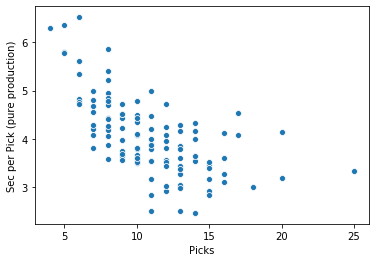

In [6]:
sns.scatterplot(x = picks, y = sec_per_pick)

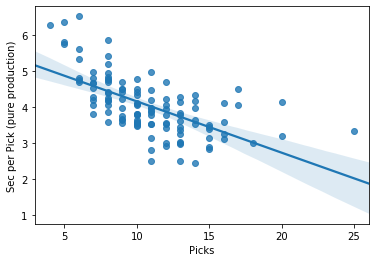

In [7]:
sns.regplot(x = picks, y = sec_per_pick)

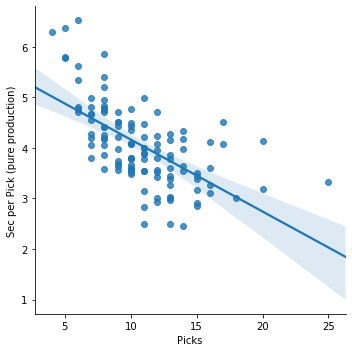

In [10]:
sns.lmplot(x = 'Picks', y = 'Sec per Pick (pure production)', data = dataFrame)

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(picks, sec_per_pick)
print("slope: %f    intercept: %f r-value: %f " % (slope, intercept, r_value))

slope: -0.142460    intercept: 5.590953 r-value: -0.623106 


In [7]:
print("R-squared: %f p-value: %f" % (r_value**2, p_value) )

R-squared: 0.388261 p-value: 0.000000


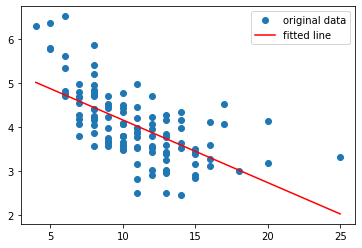

In [8]:
plt.plot(picks, sec_per_pick, 'o', label='original data')
plt.plot(picks, intercept + slope*picks, 'r', label='fitted line')
plt.legend()
plt.show()

In [9]:
UniquePicks = dataFrame.Picks.unique()
DataFrameDict = {elem : pd.DataFrame for elem in UniquePicks}

In [10]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = dataFrame[:][dataFrame.Picks == key]
    DataFrameDict[key] = DataFrameDict[key].drop("Week/Recipe", axis = 1)

In [11]:
DF_by_picks = pd.DataFrame(data=None)

In [12]:
for key in DataFrameDict.keys():
    DF_by_picks =  pd.concat([DF_by_picks, DataFrameDict[key]], axis = 1, join='outer')
print(DF_by_picks)

     Sec per Pick (pure production)  Picks  Sec per Pick (pure production)  \
0                          6.294643    4.0                             NaN   
1                               NaN    NaN                        5.805081   
2                               NaN    NaN                        6.368316   
3                               NaN    NaN                        5.772031   
4                               NaN    NaN                             NaN   
..                              ...    ...                             ...   
113                             NaN    NaN                             NaN   
114                             NaN    NaN                             NaN   
115                             NaN    NaN                             NaN   
116                             NaN    NaN                             NaN   
117                             NaN    NaN                             NaN   

     Picks  Sec per Pick (pure production)  Picks  \
0      NaN

DF_by_picks.plot.box(grid = 'True')

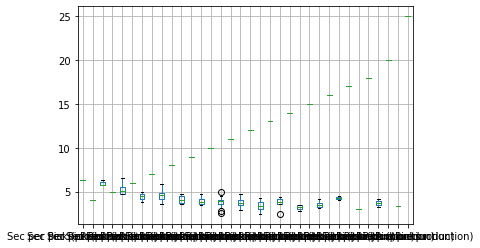

In [13]:
DF_by_picks.plot.box(grid = 'True')

In [16]:
DataFrameDict[9] 

,Week/Recipe,Sec per Pick (pure production),Picks
35,2020-07 A2,3.972789,9
36,2020-07 C2,3.638221,9
37,2020-07 D2,4.438306,9
38,2020-08 J2,4.513655,9
39,2020-09 C2,3.750043,9
40,2020-09 N4,4.226016,9
41,2020-10 B2,3.564049,9
42,2020-11 E2,4.520418,9
43,2020-11 H2,4.715939,9
44,2020-11 J2,3.685740,9


In [17]:
DataFrameDict[9] = DataFrameDict[9].drop("Week/Recipe", axis = 1)

In [18]:
DataFrameDict[9] 

,Sec per Pick (pure production),Picks
35,3.972789,9
36,3.638221,9
37,4.438306,9
38,4.513655,9
39,3.750043,9
40,4.226016,9
41,3.564049,9
42,4.520418,9
43,4.715939,9
44,3.685740,9
